In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import time
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

folder = '5k-10k'

In [2]:
def loader_data(directed):
    
    # Load the explored values of n
    N = np.load('results/{}/sizes.npy'.format(folder))
    print(N)
    
    # check the directed value
    if directed: lab = ''
    else: lab = '_und'
        
    stats = {}
    data = {}
    # reading dataframes
    for n in N:
        # reading from keys
        with open("results/{}/keys{}.txt".format(folder, n), "r") as f:
            keys = eval(f.read())
        # STATS
        stats[n] = {}
        for key in keys:
            stats[n][key] = pd.read_csv("results/{}/stats{}_{}_{}.csv".format(folder, lab, n, str(key)))
        # DATA
        data[n] = {}
        for key in keys:
            data[n][key] = [pd.read_csv("results/{}/data{}_{}_{}_metrics.csv".format(folder, lab, n, str(key))),
                         pd.read_csv("results/{}/data{}_{}_{}_levels.csv".format(folder, lab, n, str(key)))]

    return stats, data

In [3]:
stats_dir, data_dir = loader_data(True) #directed
stats_und, data_und = loader_data(False) #undirected

[ 5000 10000]
[ 5000 10000]


## Results

The graph will be disconnected for values < log(n)/n (sharp phase transition for P: G is connected)

For n = 10^3, this threshold is approximately 0.007

NB: this visualization in valid only for the preliminary results.


In [4]:
# size to be visualized
K = 10000

In [5]:
def plot_data(directed, data):
    
    if directed: 
        lab = 'directed'
    else : lab = 'undirected'  
    
    fig, axs = plt.subplots(7,2,figsize = (20,40))
    
    for i, k in enumerate(data.keys()):
        axs[i,0].set_title('Metrics with p = {}'.format(k))
        data[k][0].boxplot(ax=axs[i,0])
        axs[i,1].set_title('Levels with p = {}'.format(k))
        data[k][1].boxplot(ax=axs[i,1])    

    plt.savefig('images/box_{}_{}.jpeg'.format(lab, K))
    
    return

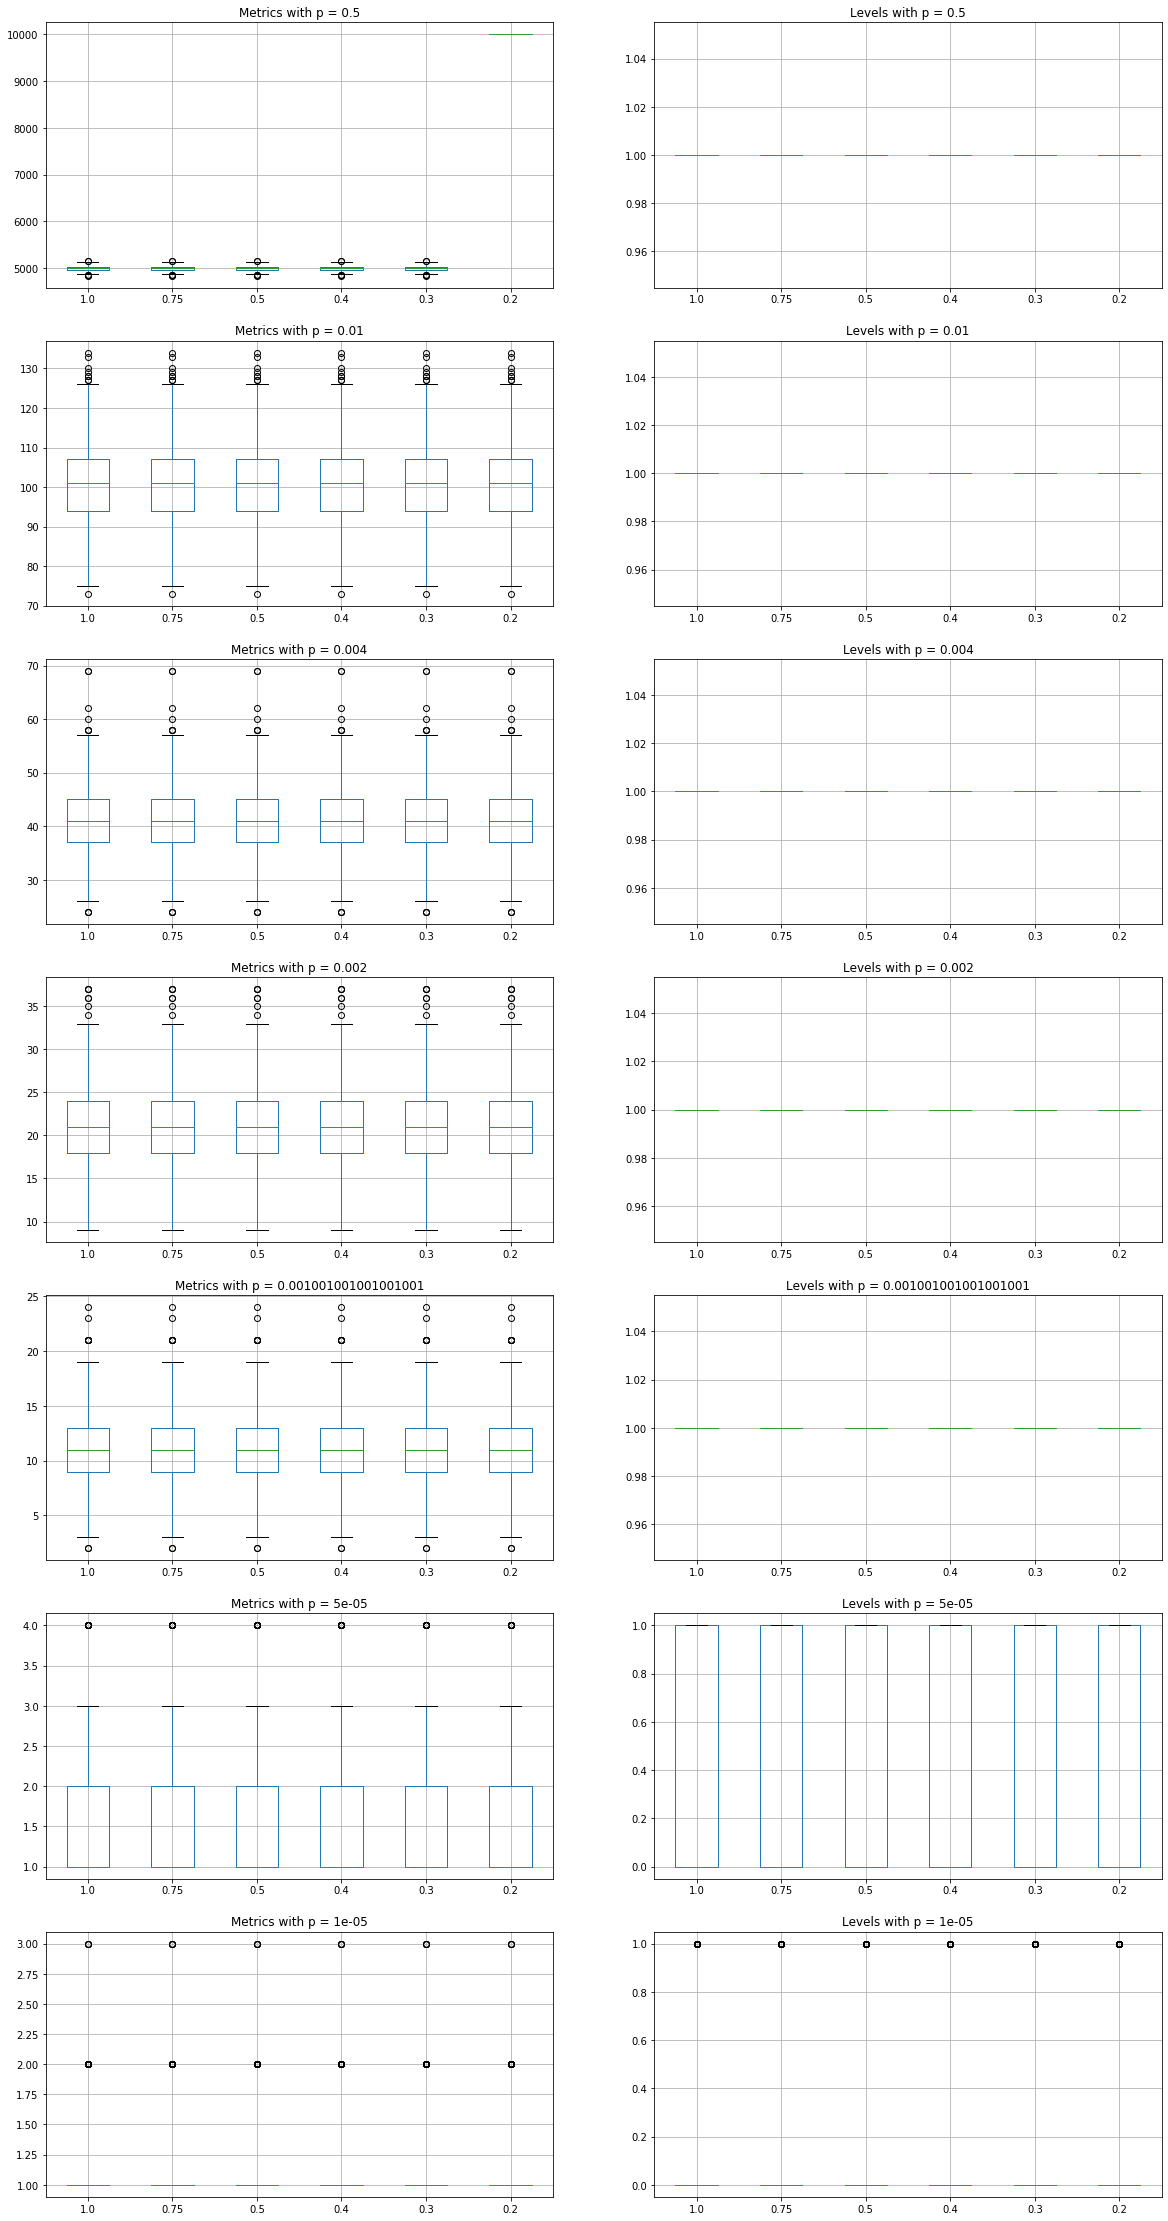

In [6]:
plot_data(True, data_dir[K])

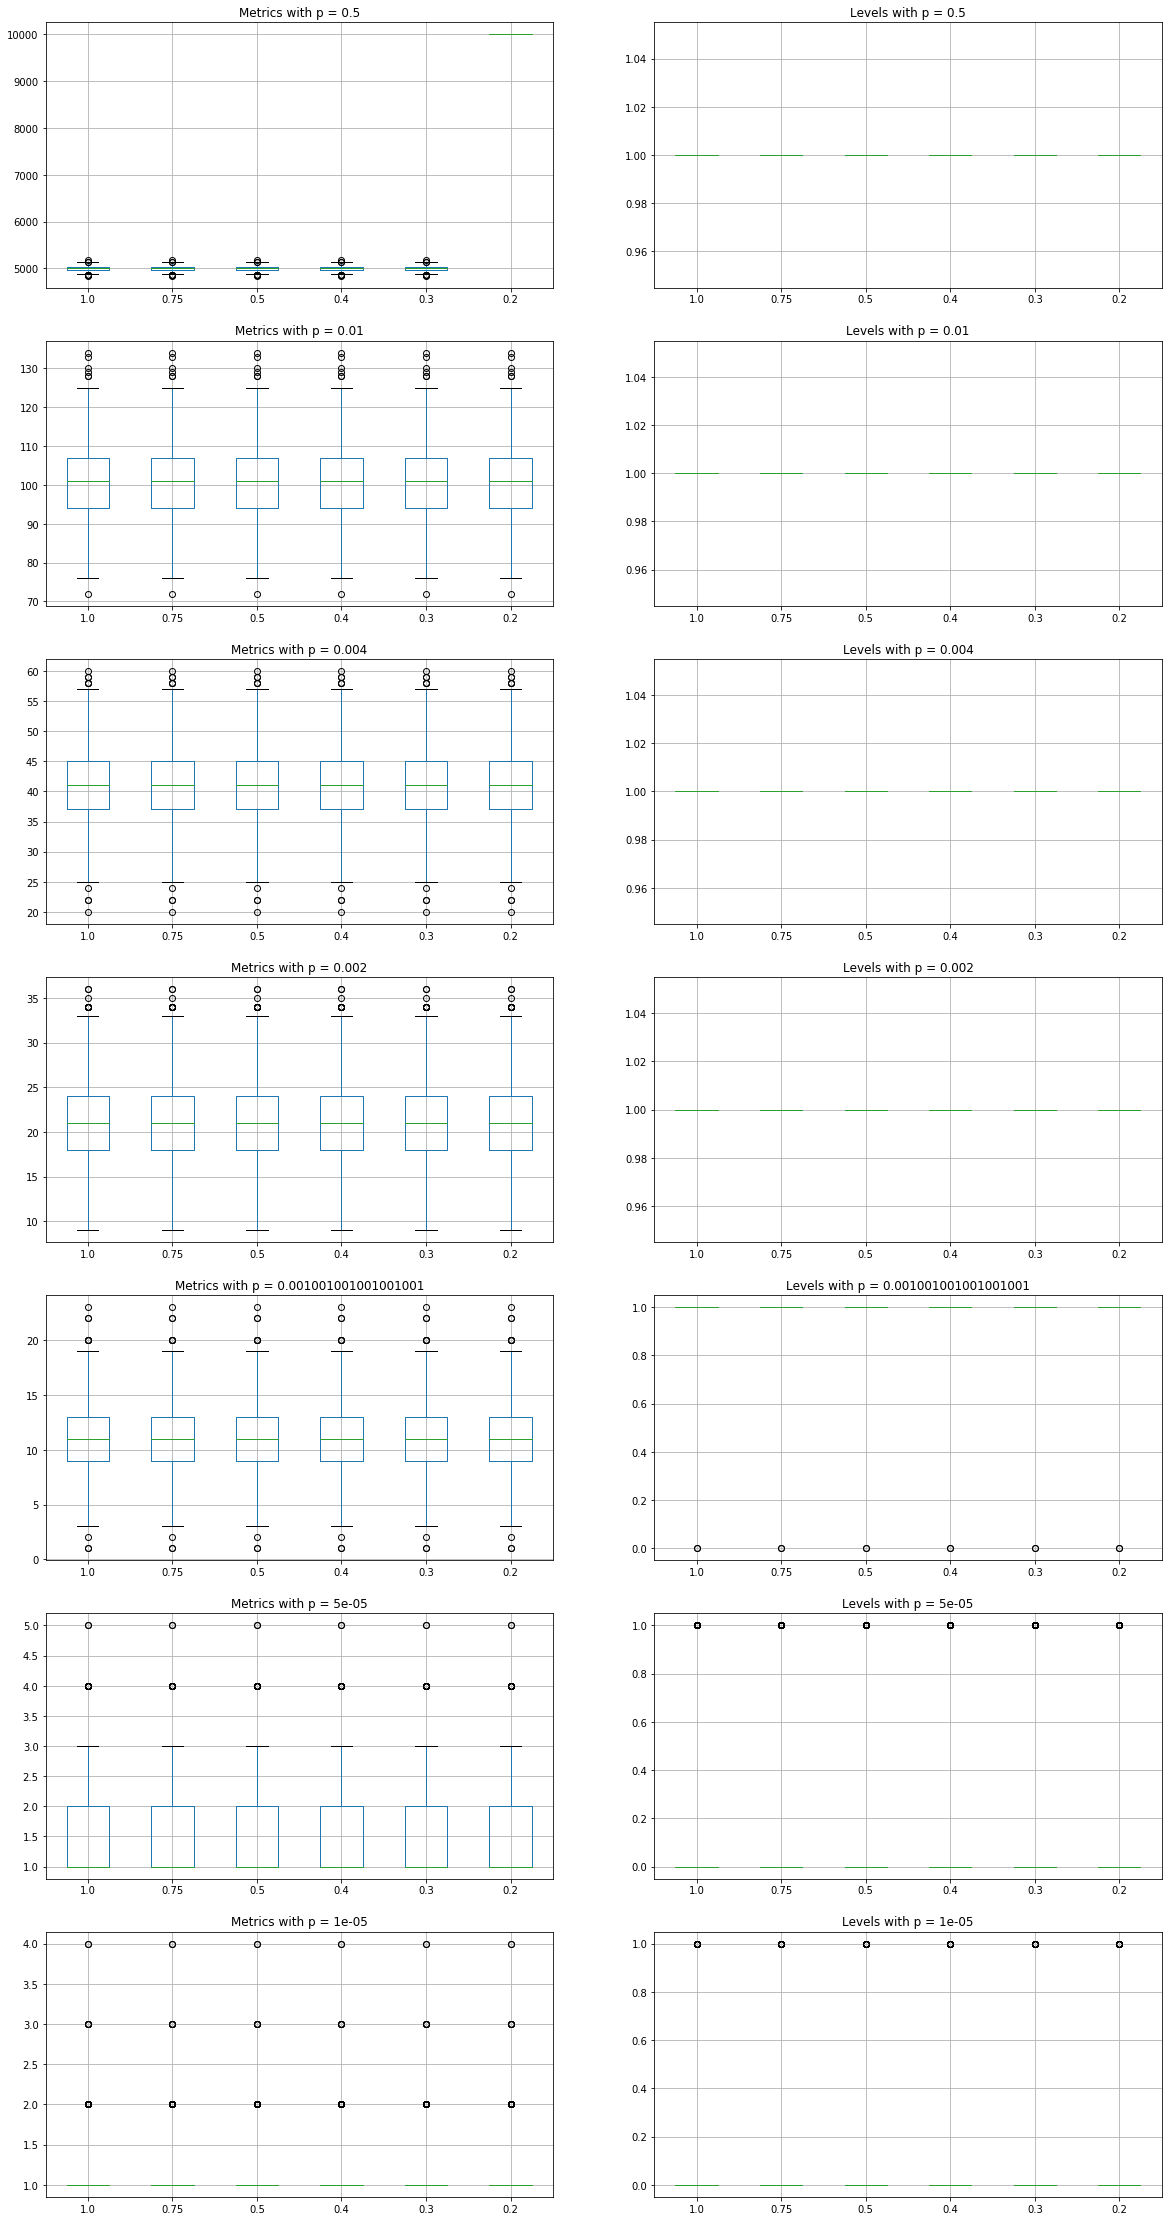

In [7]:
plot_data(False, data_und[K])

In [8]:
def plot_stats(directed, data):
    
    if directed: 
        lab = 'directed'
    else : lab = 'undirected'  
    
    fig, axs = plt.subplots(7,2,figsize = (20,40))
    
    for i, k in enumerate(data.keys()):
        axs[i,0].set_title('AVG Metrics with p = {}'.format(k))
        data[k].plot(kind='line',x='res',y='avg_FLTR',ax=axs[i,0])
        axs[i,1].set_title('AVG Levels with p = {}'.format(k))
        data[k].plot(kind='line',x='res',y='avg_exp_level',ax=axs[i,1])    

    plt.savefig('images/statsplot_{}_{}.jpeg'.format(lab, K))

In [9]:
print("### DIRECTED ###", end = "\n\n")
for k in stats_dir[K].keys():
    print("Gnp with p = ", k)
    print(stats_dir[K][k], end = "\n\n")

### DIRECTED ###

Gnp with p =  0.5
    res   avg_FLTR  avg_exp_level
0  1.00   4997.436            1.0
1  0.75   4997.436            1.0
2  0.50   4997.436            1.0
3  0.40   4997.436            1.0
4  0.30   4997.436            1.0
5  0.20  10000.000            1.0

Gnp with p =  0.01
    res  avg_FLTR  avg_exp_level
0  1.00   100.846            1.0
1  0.75   100.846            1.0
2  0.50   100.846            1.0
3  0.40   100.846            1.0
4  0.30   100.846            1.0
5  0.20   100.846            1.0

Gnp with p =  0.004
    res  avg_FLTR  avg_exp_level
0  1.00    40.912            1.0
1  0.75    40.912            1.0
2  0.50    40.912            1.0
3  0.40    40.912            1.0
4  0.30    40.912            1.0
5  0.20    40.912            1.0

Gnp with p =  0.002
    res  avg_FLTR  avg_exp_level
0  1.00    21.308            1.0
1  0.75    21.308            1.0
2  0.50    21.308            1.0
3  0.40    21.308            1.0
4  0.30    21.308            1.0
5  0

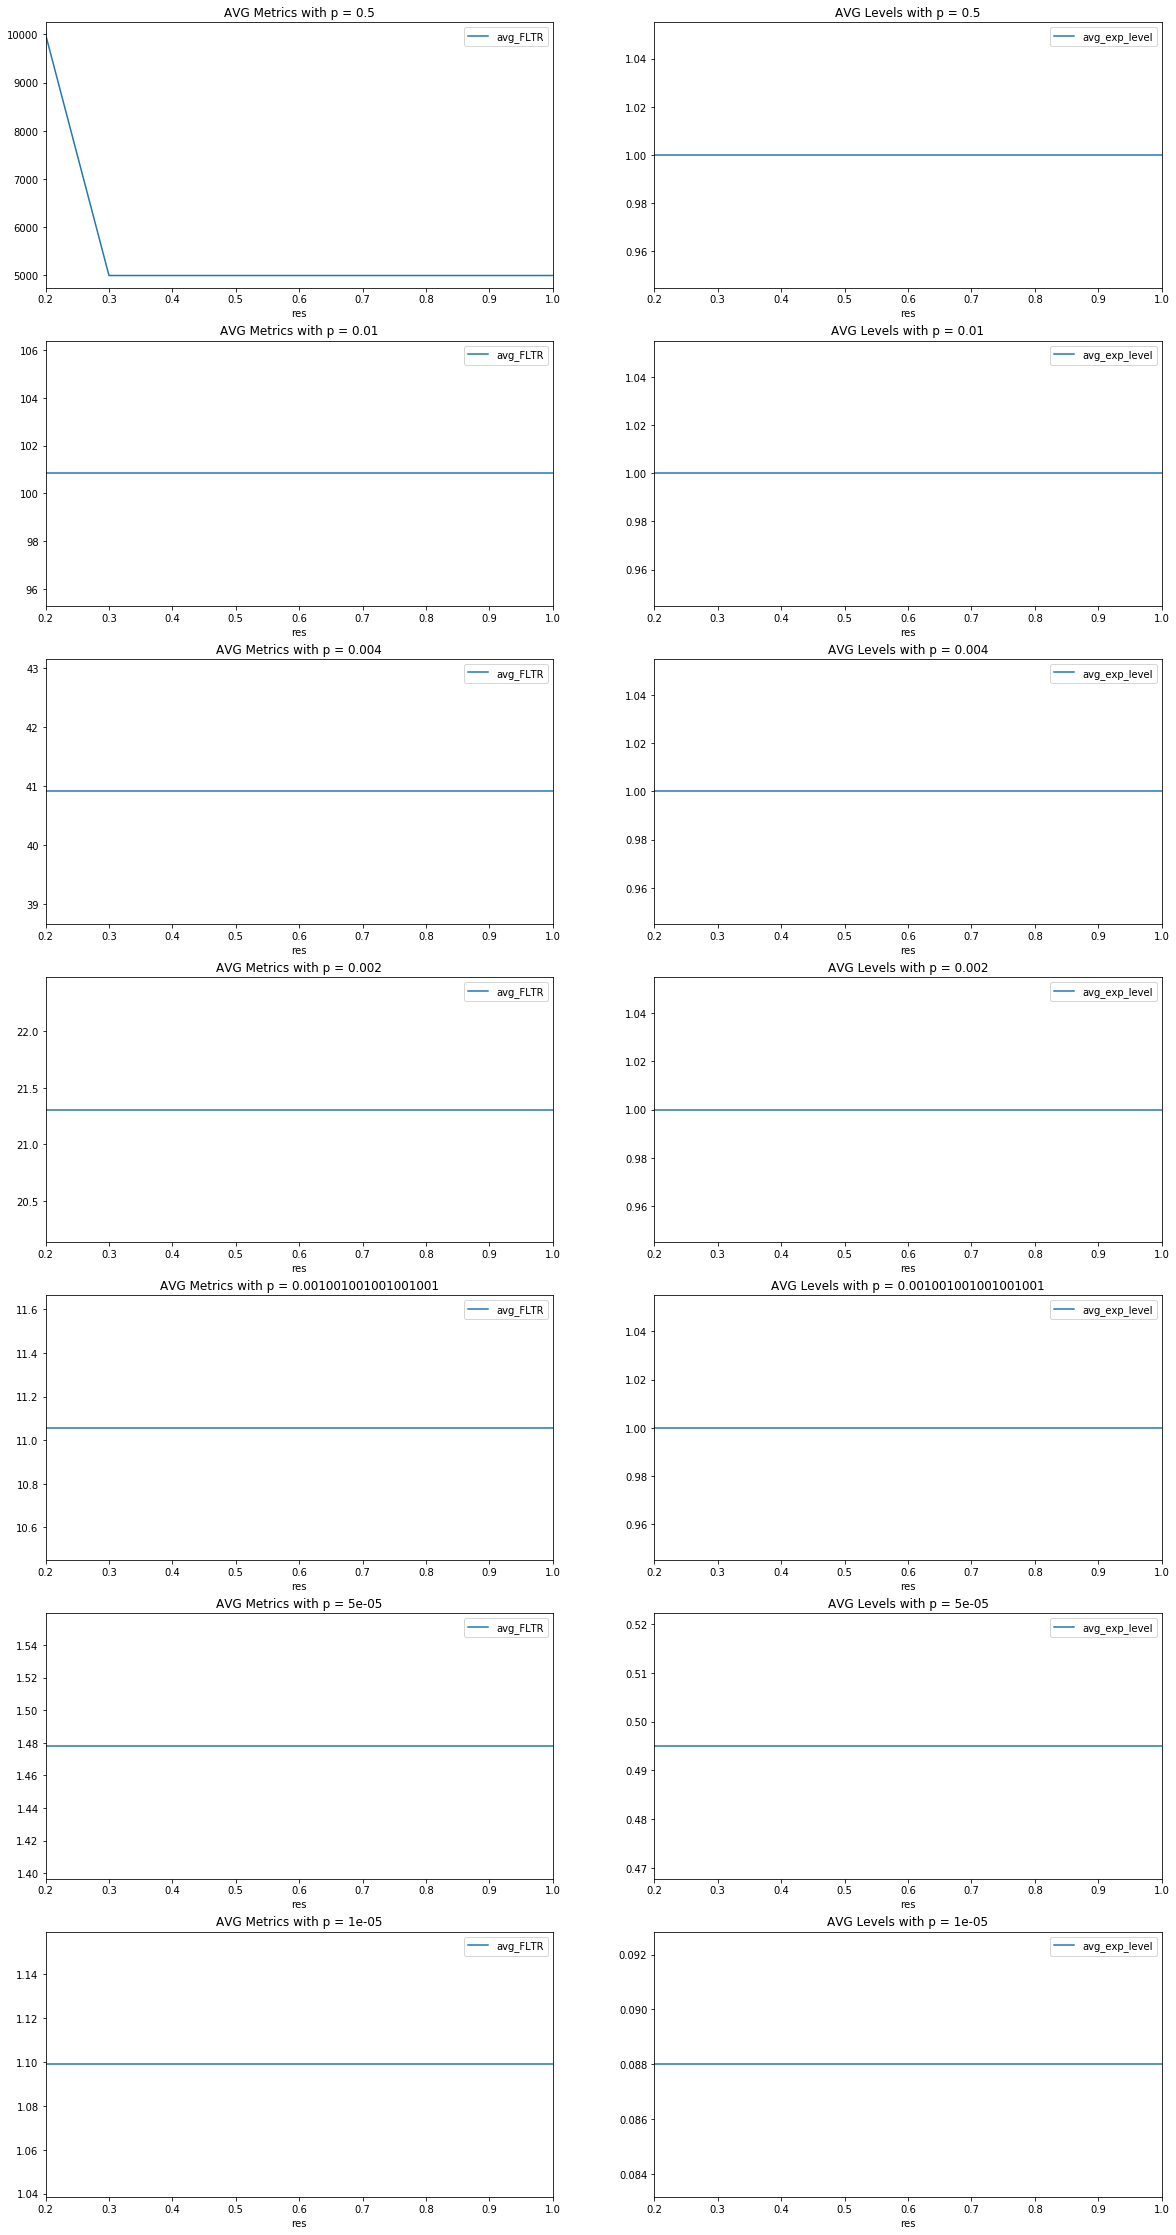

In [10]:
plot_stats(True, stats_dir[K])

In [11]:
print("### UNDIRECTED ###", end = "\n\n")

for k in stats_und[K].keys():
    print("Gnp with p = ", k)
    print(stats_und[K][k], end = "\n\n")

### UNDIRECTED ###

Gnp with p =  0.5
    res   avg_FLTR  avg_exp_level
0  1.00   5000.343            1.0
1  0.75   5000.343            1.0
2  0.50   5000.343            1.0
3  0.40   5000.343            1.0
4  0.30   5000.343            1.0
5  0.20  10000.000            1.0

Gnp with p =  0.01
    res  avg_FLTR  avg_exp_level
0  1.00   100.862            1.0
1  0.75   100.862            1.0
2  0.50   100.862            1.0
3  0.40   100.862            1.0
4  0.30   100.862            1.0
5  0.20   100.862            1.0

Gnp with p =  0.004
    res  avg_FLTR  avg_exp_level
0  1.00    40.978            1.0
1  0.75    40.978            1.0
2  0.50    40.978            1.0
3  0.40    40.978            1.0
4  0.30    40.978            1.0
5  0.20    40.978            1.0

Gnp with p =  0.002
    res  avg_FLTR  avg_exp_level
0  1.00    21.381            1.0
1  0.75    21.381            1.0
2  0.50    21.381            1.0
3  0.40    21.381            1.0
4  0.30    21.381            1.0
5 

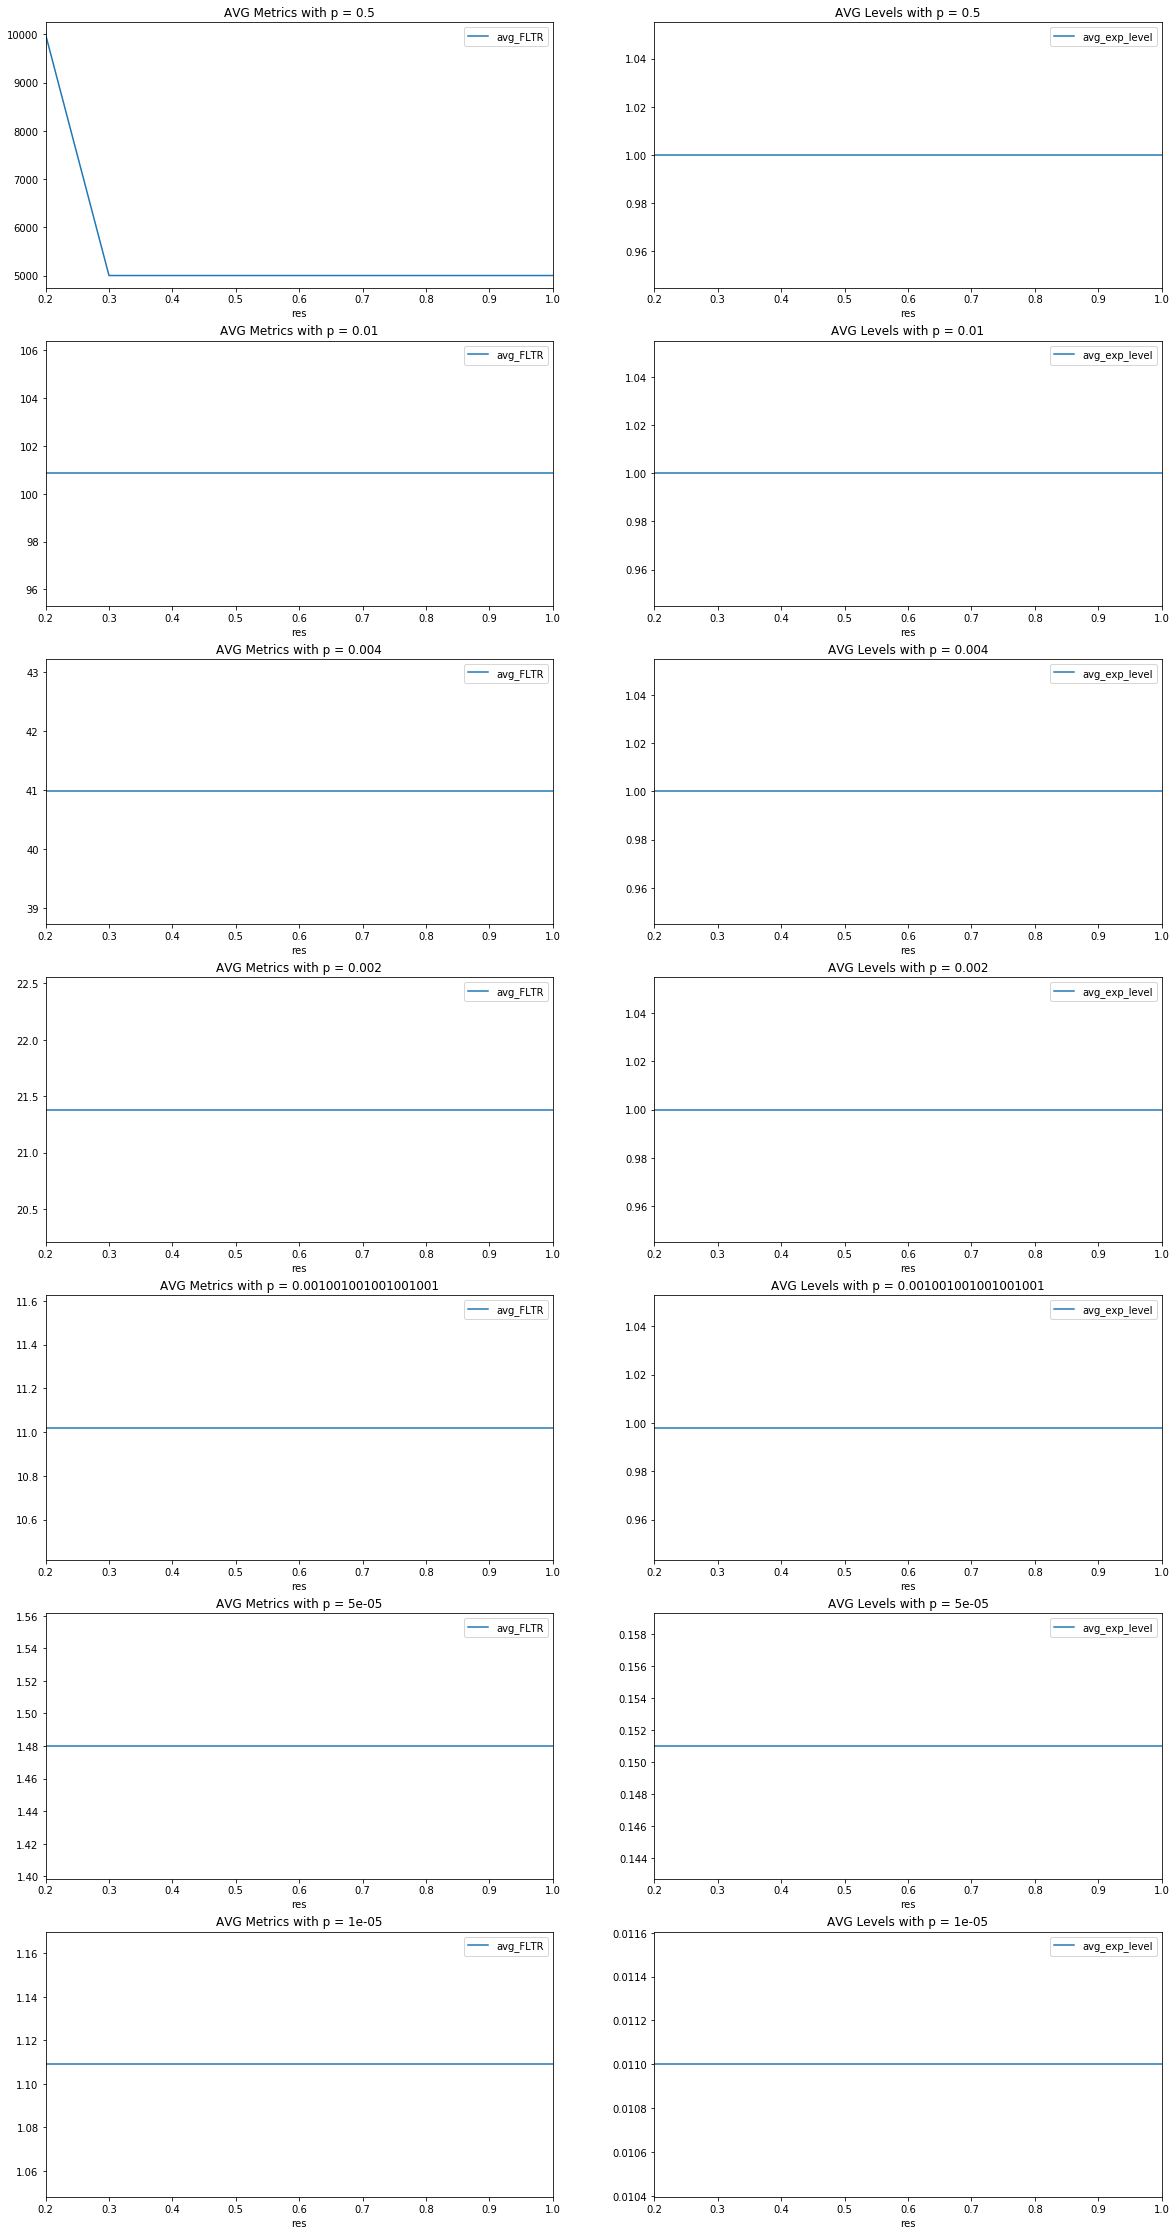

In [12]:
plot_stats(False, stats_und[K])